In [22]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load the .zarr file
zarr_path = "memory_v16.zarr"  # Update with the actual path to your file
data = zarr.open(zarr_path, mode='r')

# Explore available keys in the zarr file
print(data.tree())

/
 ├── data
 │   ├── action (6735, 2) float32
 │   ├── img (6735, 96, 96, 3) uint8
 │   ├── n_contacts (6735, 1) float32
 │   └── state (6735, 5) float32
 └── meta
     └── episode_ends (101,) int64


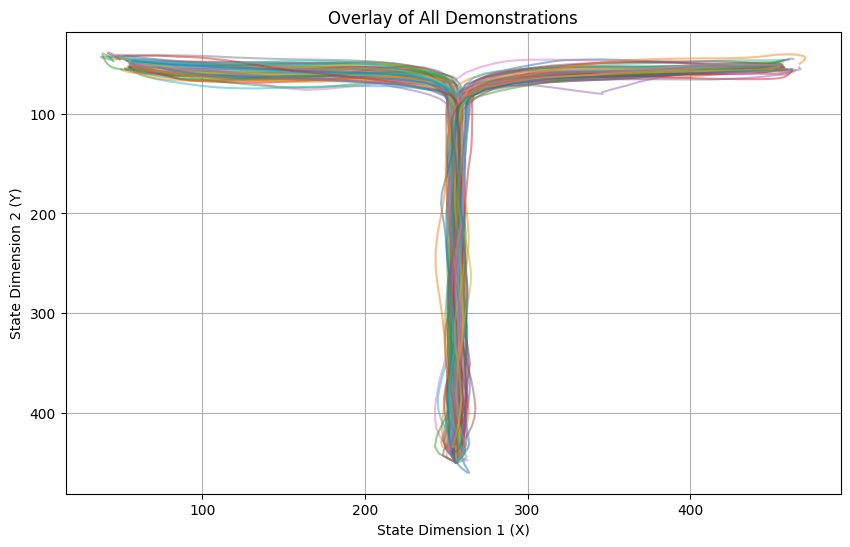

In [24]:
states = np.array(data['data']['state'])  # Shape: (5163, 5)
episode_ends = np.array(data['meta']['episode_ends'])  # Shape: (100,)

# Split the states into episodes
start_idx = 0
episodes = []
for end_idx in episode_ends:
    episodes.append(states[start_idx:end_idx])
    start_idx = end_idx

# Overlay all demonstrations (assuming 2D: x=state[:,0], y=state[:,1])
plt.figure(figsize=(10, 6))
for episode in episodes:
    plt.plot(episode[:, 0], episode[:, 1], alpha=0.5)  # Adjust indices if needed

plt.gca().invert_yaxis()
plt.title("Overlay of All Demonstrations")
plt.xlabel("State Dimension 1 (X)")
plt.ylabel("State Dimension 2 (Y)")
plt.grid(True)
plt.show()